In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import datetime
pd.set_option("display.max_rows", None)
from collections import Counter
import operator
import pickle
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
np.random.seed(2)
#pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('BPI_Challenge_2012.xes.gz_UNPACKED.csv', index_col=[0])
start = time.time()
df.drop(columns=['org:resource'], inplace=True)
df['next_event'] = df['concept:name'].shift(-1)
df['previous_event'] = df['concept:name'].shift(1)
df['pp_event'] = df['concept:name'].shift(2)
df['ppp_event'] = df['concept:name'].shift(3)
df['p_lifecycle:transition'] = df['lifecycle:transition'].shift(1)
df['next_case'] = df['case:concept:name'].shift(-1).fillna(0)
df['next_case1'] = df['next_case'].shift(-1).fillna(0)
df['datetime'] = pd.to_datetime(df['time:timestamp'], errors='coerce', utc=True)
df['weekday'] = df['datetime'].dt.weekday
df['previous_weekday'] = df['weekday'].shift(1)
df['hour'] =  df['datetime'].dt.hour
df['minute'] =  df['datetime'].dt.minute
df['month'] =  df['datetime'].dt.month
df['next_datetime'] = df['datetime'].shift(-1)
df['timedelta'] = (df['next_datetime'] - df['datetime']).astype('timedelta64[s]')
df = df[(df['case:concept:name'].astype(int)) == (df['next_case'].astype(int))]
df['previous_timedelta'] = df['timedelta'].shift(1)
df['pp_timedelta'] = df['timedelta'].shift(2)
df['ppp_timedelta'] = df['timedelta'].shift(3)
print(len(df))
df.dropna(inplace=True)
df.iloc[:10]
dfxx = df[['hour', 'minute', 'previous_timedelta', 'pp_timedelta', 'ppp_timedelta']]
dfx = df[['concept:name', 'previous_event', 'lifecycle:transition', 'pp_event', 'ppp_event', 'p_lifecycle:transition', 'weekday', 'month']]
dfy = (df[['timedelta']])
valx = dfx
valy = dfy
dummies = pd.get_dummies(dfx.astype('str'))
dfx = dfxx.join(dummies)
trainlen = int(len(df)*0.7)
x_train, y_train = dfx[:trainlen], dfy[:trainlen]
x_test, y_test = dfx[trainlen:], dfy[trainlen:]
df2 = x_train.join(y_train)
dftest = x_test.join(y_test)
valy = y_test
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)
print(len(df))
df.iloc[-100:]

249113
249110


,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ,next_event,previous_event,pp_event,ppp_event,...,weekday,previous_weekday,hour,minute,month,next_datetime,timedelta,previous_timedelta,pp_timedelta,ppp_timedelta
262092,COMPLETE,O_SENT_BACK,2012-03-09 10:43:23.173000+01:00,2012-02-29 22:42:41.754000+01:00,214355,5000,W_Valideren aanvraag,W_Nabellen offertes,W_Completeren aanvraag,W_Nabellen offertes,...,4,4.0,9,43,3,2012-03-09 09:43:23.314000+00:00,0.0,10.0,569730.0,1.0
262093,SCHEDULE,W_Valideren aanvraag,2012-03-09 10:43:23.314000+01:00,2012-02-29 22:42:41.754000+01:00,214355,5000,W_Nabellen offertes,O_SENT_BACK,W_Nabellen offertes,W_Completeren aanvraag,...,4,4.0,9,43,3,2012-03-09 09:43:24.987000+00:00,1.0,0.0,10.0,569730.0
262095,COMPLETE,A_SUBMITTED,2012-02-29 22:43:26.064000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,A_PARTLYSUBMITTED,W_Nabellen offertes,W_Valideren aanvraag,O_SENT_BACK,...,2,4.0,21,43,2,2012-02-29 21:43:26.263000+00:00,0.0,1.0,0.0,10.0
262096,COMPLETE,A_PARTLYSUBMITTED,2012-02-29 22:43:26.263000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,A_PREACCEPTED,A_SUBMITTED,W_Nabellen offertes,W_Valideren aanvraag,...,2,2.0,21,43,2,2012-02-29 21:43:57.138000+00:00,30.0,0.0,1.0,0.0
262097,COMPLETE,A_PREACCEPTED,2012-02-29 22:43:57.138000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,W_Completeren aanvraag,A_PARTLYSUBMITTED,A_SUBMITTED,W_Nabellen offertes,...,2,2.0,21,43,2,2012-02-29 21:43:57.548000+00:00,0.0,30.0,0.0,1.0
262098,SCHEDULE,W_Completeren aanvraag,2012-02-29 22:43:57.548000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,W_Completeren aanvraag,A_PREACCEPTED,A_PARTLYSUBMITTED,A_SUBMITTED,...,2,2.0,21,43,2,2012-03-01 09:09:27.984000+00:00,41130.0,0.0,30.0,0.0
262099,START,W_Completeren aanvraag,2012-03-01 10:09:27.984000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,W_Completeren aanvraag,W_Completeren aanvraag,A_PREACCEPTED,A_PARTLYSUBMITTED,...,3,2.0,9,9,3,2012-03-01 09:30:29.681000+00:00,1261.0,41130.0,0.0,30.0
262100,COMPLETE,W_Completeren aanvraag,2012-03-01 10:30:29.681000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_PREACCEPTED,...,3,3.0,9,30,3,2012-03-01 15:53:53.903000+00:00,23004.0,1261.0,41130.0,0.0
262101,START,W_Completeren aanvraag,2012-03-01 16:53:53.903000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,A_ACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,...,3,3.0,15,53,3,2012-03-01 16:01:02.397000+00:00,428.0,23004.0,1261.0,41130.0
262102,COMPLETE,A_ACCEPTED,2012-03-01 17:01:02.397000+01:00,2012-02-29 22:43:26.064000+01:00,214358,3500,O_SELECTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,...,3,3.0,16,1,3,2012-03-01 16:03:41.306000+00:00,158.0,428.0,23004.0,1261.0


In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
#splitter NN
lrelu = tf.keras.layers.LeakyReLU(alpha=0.3)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(121,1)),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.Dense(228, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(48, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(), 
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])
model.summary()
loss_fn = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

ftrl = tf.keras.optimizers.Ftrl(
    learning_rate=0.1,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.01,
    l2_regularization_strength=0.01,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.01,
    beta=0.1)

msle = tf.keras.losses.MeanSquaredLogarithmicError()
def loss_comb(y_true, y_pred):
    return 1*msle(y_true, y_pred) + 0.00000001*(loss_fn(y_true, y_pred))

model.compile(optimizer=ftrl,
              loss=loss_fn,
              metrics=['mean_absolute_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 121)               0         
                                                                 
 batch_normalization (BatchN  (None, 121)              484       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 228)               27816     
                                                                 
 batch_normalization_1 (Batc  (None, 228)              912       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 128)               29312     
                                                                 
 batch_normalization_2 (Batc  (None, 128)              5

In [5]:
#splitter NN
model.fit(x_train, y_train, epochs=15, batch_size=512, validation_split=0.0, shuffle=True)

Epoch 1/15
341/341 [==============================] - 7s 13ms/step - loss: 17935370240.0000 - mean_absolute_error: 41872.8789
Epoch 2/15
341/341 [==============================] - 5s 14ms/step - loss: 15762590720.0000 - mean_absolute_error: 37293.0938
Epoch 3/15
341/341 [==============================] - 5s 14ms/step - loss: 15641109504.0000 - mean_absolute_error: 36592.9531
Epoch 4/15
341/341 [==============================] - 5s 15ms/step - loss: 15556135936.0000 - mean_absolute_error: 36307.6133
Epoch 5/15
341/341 [==============================] - 5s 14ms/step - loss: 15495198720.0000 - mean_absolute_error: 36176.0742
Epoch 6/15
341/341 [==============================] - 5s 14ms/step - loss: 15440710656.0000 - mean_absolute_error: 36236.4219
Epoch 7/15
341/341 [==============================] - 5s 15ms/step - loss: 15418787840.0000 - mean_absolute_error: 36024.7656
Epoch 8/15
341/341 [==============================] - 5s 14ms/step - loss: 15402810368.0000 - mean_absolute_error: 359

In [6]:
model.evaluate(x_test,  y_test, verbose=2)

2336/2336 - 11s - loss: 11836081152.0000 - mean_absolute_error: 37000.8789 - 11s/epoch - 5ms/step


[11836081152.0, 37000.87890625]

1557/1557 - 6s - loss: 16145751040.0000 - mean_absolute_error: 38487.3203 - 6s/epoch - 4ms/step
[16145751040.0, 38487.3203125] 100 epoch

1557/1557 - 6s - loss: 12990233600.0000 - mean_absolute_error: 39434.7891 - 6s/epoch - 4ms/step
[12990233600.0, 39434.7890625] 10 epoch

1557/1557 - 6s - loss: 12379001856.0000 - mean_absolute_error: 39955.4883 - 6s/epoch - 4ms/step
[12379001856.0, 39955.48828125] 5 epoch

1557/1557 - 7s - loss: 16281440256.0000 - mean_absolute_error: 34248.9844 - 7s/epoch - 4ms/step
[16281440256.0, 34248.984375] rmsprop 5epoch

1557/1557 - 6s - loss: 13425792000.0000 - mean_absolute_error: 38229.3945 - 6s/epoch - 4ms/step
[13425792000.0, 38229.39453125] ftrl 5 epoch

1557/1557 - 6s - loss: 12477991936.0000 - mean_absolute_error: 38378.7773 - 6s/epoch - 4ms/step
[12477991936.0, 38378.77734375] ftrl 25 epoch

1557/1557 - 6s - loss: 13436874752.0000 - mean_absolute_error: 37503.7383 - 6s/epoch - 4ms/step
[13436874752.0, 37503.73828125] ftrl 20 epoch 

1557/1557 - 6s - loss: 12613310464.0000 - mean_absolute_error: 36718.5391 - 6s/epoch - 4ms/step
[12613310464.0, 36718.5390625] ftrl shrinkage 0.1 beta 0.1 20 epoch 

1557/1557 - 6s - loss: 22985072640.0000 - mean_absolute_error: 38325.5352 - 6s/epoch - 4ms/step
[22985072640.0, 38325.53515625] 100 epoch

1557/1557 - 5s - loss: 11458832384.0000 - mean_absolute_error: 36769.4922 - 5s/epoch - 3ms/step
[11458832384.0, 36769.4921875] 20 epoch

1557/1557 - 6s - loss: 10764874752.0000 - mean_absolute_error: 33928.1797 - 6s/epoch - 4ms/step
[10764874752.0, 33928.1796875] 5 epoch

1557/1557 - 7s - loss: 10972633088.0000 - mean_absolute_error: 34962.5430 - 7s/epoch - 4ms/step
[10972633088.0, 34962.54296875] l2 in model, no dropout

1557/1557 - 6s - loss: 10712907776.0000 - mean_absolute_error: 33294.6133 - 6s/epoch - 4ms/step
[10712907776.0, 33294.61328125] 0.01 l1, l2

1557/1557 - 6s - loss: 12210000896.0000 - mean_absolute_error: 44738.8945 - 6s/epoch - 4ms/step
[12210000896.0, 44738.89453125]

1557/1557 - 6s - loss: 10496494592.0000 - mean_absolute_error: 31814.3359 - 6s/epoch - 4ms/step
[10496494592.0, 31814.3359375]

2336/2336 - 10s - loss: 5.0835 - mean_absolute_error: 36537.7109 - 10s/epoch - 4ms/step
[5.083494186401367, 36537.7109375]

1557/1557 - 7s - loss: 11157584896.0000 - mean_absolute_error: 36030.8945 - 7s/epoch - 4ms/step
[11157584896.0, 36030.89453125]

In [7]:
predictions = model(x_test).numpy()

In [8]:
predictions_train = model(x_train).numpy()
predictions_test = model(x_test).numpy()

In [9]:
df2['predictions_train'] = predictions_train
dftest['predictions_test'] = predictions_test

In [10]:
#test and train split on split-NN prediction
p=65
df2_short = df2[df2['predictions_train'] < np.nanpercentile(df2['predictions_train'], p)]
df2_long = df2[df2['predictions_train'] >= np.nanpercentile(df2['predictions_train'], p)]
dftest_long = dftest[dftest['predictions_test'] >= np.nanpercentile(dftest['predictions_test'], p)]
dftest_short = dftest[dftest['predictions_test'] < np.nanpercentile(dftest['predictions_test'], p)]
print(np.nanpercentile(dftest['predictions_test'], p))
print(np.nanpercentile(df2['predictions_train'], p))
df2.iloc[:100]

742.4772094726598
405.03836059570324


,hour,minute,previous_timedelta,pp_timedelta,ppp_timedelta,concept:name_A_ACCEPTED,concept:name_A_ACTIVATED,concept:name_A_APPROVED,concept:name_A_CANCELLED,concept:name_A_DECLINED,...,weekday_6,month_1,month_10,month_11,month_12,month_2,month_3,month_9,timedelta,predictions_train
3,22,39,0.0,53.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,39427.0,30751.710938
4,9,36,39427.0,0.0,53.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,356.0,254.998627
5,9,42,356.0,39427.0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,145.0,290.065735
6,9,45,145.0,356.0,39427.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,247.875275
7,9,45,0.0,145.0,356.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1.0,183.507263
8,9,45,1.0,0.0,145.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,199.737595
9,9,45,0.0,1.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.0,231.142395
10,9,45,0.0,0.0,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,2.0,202.713928
11,9,45,2.0,0.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1827.0,308087.312500
12,10,15,1827.0,2.0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,87.0,213.271408


In [11]:
#df2_long.iloc[:100]

In [12]:
#creates short training data
x = df2_short.drop(columns=['timedelta', 'predictions_train'])
y = pd.DataFrame(df2_short['timedelta'])
x_train, y_train = x, y
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_train

<tf.Tensor: shape=(113345, 121), dtype=float64, numpy=
array([[9.00000e+00, 3.60000e+01, 3.94270e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [9.00000e+00, 4.20000e+01, 3.56000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [9.00000e+00, 4.50000e+01, 1.45000e+02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.30000e+01, 3.40000e+01, 6.06735e+05, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.40000e+01, 2.40000e+01, 3.48382e+05, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.50000e+01, 9.00000e+00, 2.61859e+05, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])>

In [13]:
#SHORT MODEL 
model_short = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(121,1)),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.Dense(128, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(48, activation='relu', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
])

model_short.summary()

loss_fn = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

ftrl = tf.keras.optimizers.Ftrl(
    learning_rate=0.1,
    learning_rate_power=-0.7,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.01,
    l2_regularization_strength=0.01,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.01,
    beta=0.1)

model_short.compile(optimizer=ftrl,
              loss=loss_comb,
              metrics=['mean_absolute_error'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 121)               0         
                                                                 
 batch_normalization_4 (Batc  (None, 121)              484       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 128)               15616     
                                                                 
 dense_6 (Dense)             (None, 48)                6192      
                                                                 
 dense_7 (Dense)             (None, 48)                2352      
                                                                 
 dense_8 (Dense)             (None, 1)                 49        
                                                      

In [14]:
model_short.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.1, shuffle=True)

Epoch 1/10
200/200 [==============================] - 4s 15ms/step - loss: 2.3402 - mean_absolute_error: 313.2139 - val_loss: 1.7437 - val_mean_absolute_error: 325.8470
Epoch 2/10
200/200 [==============================] - 3s 13ms/step - loss: 1.5380 - mean_absolute_error: 307.8011 - val_loss: 1.7657 - val_mean_absolute_error: 321.7873
Epoch 3/10
200/200 [==============================] - 3s 13ms/step - loss: 1.4950 - mean_absolute_error: 307.0371 - val_loss: 1.4977 - val_mean_absolute_error: 320.3603
Epoch 4/10
200/200 [==============================] - 3s 13ms/step - loss: 1.4767 - mean_absolute_error: 306.8409 - val_loss: 1.4886 - val_mean_absolute_error: 319.6488
Epoch 5/10
200/200 [==============================] - 2s 12ms/step - loss: 1.4687 - mean_absolute_error: 306.7345 - val_loss: 1.5071 - val_mean_absolute_error: 320.8162
Epoch 6/10
200/200 [==============================] - 3s 13ms/step - loss: 1.4685 - mean_absolute_error: 306.6995 - val_loss: 1.4749 - val_mean_absolute_er

In [15]:
predictions_short = model_short(x_train).numpy()

In [16]:
df2_short['predictions_short'] = predictions_short

C:\Users\20175892\AppData\Local\Temp\ipykernel_18604\3082676455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_short['predictions_short'] = predictions_short


In [17]:
print('short error old', np.square(abs(df2_short['timedelta'] - df2_short['predictions_train'])).mean())

short error old 17650329.465440124


In [18]:
np.square(abs(df2_short['timedelta'] - df2_short['predictions_short'])).mean()

17691070.2166021

In [19]:
np.square(np.log(df2_short['timedelta'] + 1.) - np.log(df2_short['predictions_short'] + 1.)).mean()

1.1275305796544475

In [20]:
np.square(np.log(df2_short['timedelta'] + 1.) - np.log(df2_short['predictions_train'] + 1.)).mean()

C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


14.251064553023602

In [21]:
#create train data long
x = df2_long.drop(columns=['timedelta', 'predictions_train'])
y = pd.DataFrame(df2_long['timedelta'])
x_train, y_train = x[:trainlen], y[:trainlen]
x_test, y_test = x[trainlen:], y[trainlen:]
valy = y_test
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)

In [22]:
#model long
model_long = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(121,1)),
  tf.keras.layers.BatchNormalization(),  
  tf.keras.layers.Dense(228, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(48, activation='swish', activity_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(48, activation='swish'),
  tf.keras.layers.Dense(1, activation='linear')
])

model_long.summary()

loss_fn = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

ftrl = tf.keras.optimizers.Ftrl(
    learning_rate=0.1,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.01,
    l2_regularization_strength=0.01,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.01,
    beta=0.1)

def loss_comb(y_true, y_pred):
    return 1*msle(y_true, y_pred) + 0.01*(loss_fn(y_true, y_pred))

model_long.compile(optimizer=ftrl,
              loss=loss_fn,
              metrics=['mean_absolute_error'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 121)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 121)              484       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 228)               27816     
                                                                 
 batch_normalization_6 (Batc  (None, 228)              912       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 128)               29312     
                                                                 
 batch_normalization_7 (Batc  (None, 128)             

In [23]:
#model_long.fit(x_train, y_train, epochs=1, batch_size=512, validation_split=0.1, shuffle=True)

In [24]:
predictions_long = model(x_train).numpy()
df2_long['predictions_long'] = predictions_long
np.square((abs(df2_long['timedelta'] - df2_long['predictions_long']))).mean()

C:\Users\20175892\AppData\Local\Temp\ipykernel_18604\2783323390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_long['predictions_long'] = predictions_long


41859798322.01175

In [25]:
np.square(abs(df2_long['timedelta'] - df2_long['predictions_train'])).mean()

41859798322.01175

In [26]:
np.square(np.log(df2_long['timedelta'] + 1.) - np.log(df2_long['predictions_long'] + 1.)).mean()

15.53017706664673

In [27]:
np.square(np.log(df2_long['timedelta'] + 1.) - np.log(df2_long['predictions_train'] + 1.)).mean()

15.53017706664673

In [28]:
df2_long['mse'] = np.square((abs(df2_long['timedelta'] - df2_long['predictions_long'])))
#df2_long.iloc[:100]

C:\Users\20175892\AppData\Local\Temp\ipykernel_18604\4084488403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_long['mse'] = np.square((abs(df2_long['timedelta'] - df2_long['predictions_long'])))


In [29]:
x = dftest_short.drop(columns=['timedelta', 'predictions_test'])
y = pd.DataFrame(dftest_short['timedelta'])
x_train, y_train = x, y
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

In [30]:
predictions_test_short = model_short(x_train).numpy()
dftest_short['predictions'] = predictions_test_short
dftest_short.iloc[:10]

C:\Users\20175892\AppData\Local\Temp\ipykernel_18604\4120505552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_short['predictions'] = predictions_test_short


,hour,minute,previous_timedelta,pp_timedelta,ppp_timedelta,concept:name_A_ACCEPTED,concept:name_A_ACTIVATED,concept:name_A_APPROVED,concept:name_A_CANCELLED,concept:name_A_DECLINED,...,month_1,month_10,month_11,month_12,month_2,month_3,month_9,timedelta,predictions_test,predictions
183419,11,20,331833.0,70.0,261859.0,0,0,0,0,0,...,0,0,0,0,1,0,0,67.0,258.086456,77.498360
183421,14,32,357050.0,67.0,331833.0,0,0,0,0,0,...,0,0,0,0,1,0,0,38.0,273.802460,77.522926
183423,8,39,410760.0,38.0,357050.0,0,0,0,0,0,...,0,0,0,0,1,0,0,257.0,262.353424,77.578552
183425,8,15,343902.0,257.0,410760.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,325.442230,0.074923
183426,8,15,0.0,343902.0,257.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0.0,335.937378,0.074923
183428,23,23,0.0,0.0,343902.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,138.058670,0.074923
183429,23,23,0.0,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,49.0,214.975418,28.446117
183430,23,24,49.0,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.0,285.131714,0.074923
183432,12,21,46607.0,0.0,49.0,0,0,0,0,0,...,1,0,0,0,0,0,0,604.0,231.076752,139.980316
183434,12,31,7.0,604.0,46607.0,0,0,0,0,0,...,1,0,0,0,0,0,0,48.0,432.994598,83.517418


In [31]:
x = dftest_long.drop(columns=['timedelta', 'predictions_test'])
y = pd.DataFrame(dftest_long['timedelta'])
x_train, y_train = x, y
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)

In [32]:
predictions_test_long = model(x_train).numpy()
dftest_long['predictions'] = predictions_test_long
dftest_long.iloc[:100]

C:\Users\20175892\AppData\Local\Temp\ipykernel_18604\547458668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest_long['predictions'] = predictions_test_long


,hour,minute,previous_timedelta,pp_timedelta,ppp_timedelta,concept:name_A_ACCEPTED,concept:name_A_ACTIVATED,concept:name_A_APPROVED,concept:name_A_CANCELLED,concept:name_A_DECLINED,...,month_1,month_10,month_11,month_12,month_2,month_3,month_9,timedelta,predictions_test,predictions
183418,15,10,70.0,261859.0,45.0,0,0,0,0,0,...,0,0,0,0,1,0,0,331833.0,269766.812500,269766.812500
183420,11,21,67.0,331833.0,70.0,0,0,0,0,0,...,0,0,0,0,1,0,0,357050.0,292299.062500,292299.062500
183422,14,33,38.0,357050.0,67.0,0,0,0,0,0,...,0,0,0,0,1,0,0,410760.0,265500.281250,265500.281250
183424,8,43,257.0,410760.0,38.0,0,0,0,0,0,...,0,0,0,0,1,0,0,343902.0,266629.625000,266629.625000
183431,23,24,0.0,49.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,46607.0,92566.117188,92566.117188
183433,12,31,604.0,46607.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,7.0,34472.738281,34472.738281
183441,12,32,1.0,0.0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,620022.0,287595.093750,287595.093750
183443,16,48,118.0,620022.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,96614.0,254011.171875,254011.171875
183445,19,43,272.0,96614.0,118.0,0,0,0,0,0,...,1,0,0,0,0,0,0,153623.0,296011.843750,296011.843750
183447,14,24,57.0,153623.0,272.0,0,0,0,0,0,...,1,0,0,0,0,0,0,177568.0,250137.015625,250137.015625


In [33]:
#eval long
print('short old test log', np.square(np.log2(dftest_short['timedelta'] + 1.) - np.log2(dftest_short['predictions_test'] + 1.)).mean())
print('short new test log',np.square(np.log2(dftest_short['timedelta'] + 1.) - np.log2(dftest_short['predictions'] + 1.)).mean(), '\n')
print('short old test mse',np.square(abs(dftest_short['timedelta'] - dftest_short['predictions_test'])).mean())
print('short new test mse',np.square(abs(dftest_short['timedelta'] - dftest_short['predictions'])).mean(), '\n')
print('long old test mse', np.square(abs(dftest_long['timedelta'] - dftest_long['predictions_test'])).mean())
print('long new test mse', np.square(abs(dftest_long['timedelta'] - dftest_long['predictions'])).mean(), '\n')
print('long old test log', np.square(np.log2(dftest_long['timedelta'] + 1.) - np.log2(dftest_long['predictions_test'] + 1.)).mean())
print('long new test log', np.square(np.log2(dftest_long['timedelta'] + 1.) - np.log2(dftest_long['predictions'] + 1.)).mean())

short old test log 29.734063059183985
short new test log 2.7588981818156446 

short old test mse 21111074.578857597
short new test mse 21183419.71020662 

long old test mse 33777607910.307407
long new test mse 33777607910.307407 

long old test log 48.17417511828086
long new test log 48.17417511828086


C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
dftest_all = pd.concat([dftest_long, dftest_short], sort=False).sort_index()
dftest_all['error'] = abs(dftest_all['predictions'] - dftest_all['timedelta'])
dftest_all.iloc[3000:3100]

,hour,minute,previous_timedelta,pp_timedelta,ppp_timedelta,concept:name_A_ACCEPTED,concept:name_A_ACTIVATED,concept:name_A_APPROVED,concept:name_A_CANCELLED,concept:name_A_DECLINED,...,month_10,month_11,month_12,month_2,month_3,month_9,timedelta,predictions_test,predictions,error
186562,17,6,47.0,0.0,226.0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,210.186798,0.074923,0.074923
186563,17,6,0.0,47.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0.0,225.209732,0.074923,0.074923
186564,17,6,0.0,0.0,47.0,0,0,0,0,0,...,0,0,0,0,0,0,1.0,197.676254,1.300241,0.300241
186565,17,6,1.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,612574.0,314774.750000,314774.750000,297799.250000
186566,19,16,612574.0,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,93.0,223.858795,81.821289,11.178711
186567,19,18,93.0,612574.0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,73179.0,319241.250000,319241.250000,246062.250000
186568,15,37,73179.0,93.0,612574.0,0,0,0,0,0,...,0,0,0,0,0,0,64.0,281.744629,77.218811,13.218811
186569,15,38,64.0,73179.0,93.0,0,0,0,0,0,...,0,0,0,0,0,0,1665.0,241448.343750,241448.343750,239783.343750
186570,16,6,1665.0,64.0,73179.0,0,0,0,0,0,...,0,0,0,0,0,0,29.0,254.014664,77.157372,48.157372
186571,16,7,29.0,1665.0,64.0,0,0,0,0,0,...,0,0,0,0,0,0,232215.0,431599.750000,431599.750000,199384.750000


In [35]:
np.square(abs(dftest_all['timedelta'] - dftest_all['predictions_test'])).mean()

11836088229.679707

In [36]:
np.square(abs(dftest_all['timedelta'] - dftest_all['predictions'])).mean()

11836135253.579462

In [37]:
np.square(np.log(dftest_all['timedelta'] + 1.) - np.log(dftest_all['predictions_test'] + 1.)).mean()

C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


17.386819260032006

In [38]:
np.square(np.log(dftest_all['timedelta'] + 1.) - np.log(dftest_all['predictions'] + 1.)).mean()

8.962619724289874

In [59]:
#mean absolute error
def hourstomin(time):
    hours = str(int(time))
    minutes = str(int(time*60) % 60).format(".2f")
    seconds = str(int(time*3600) % 60)
    return (hours+'H'+minutes+'m'+seconds+'s')
print('root mean square eror new:',hourstomin(np.power(np.square(dftest_all['timedelta'] - dftest_all['predictions']).mean(), 0.5)/3600))
print('root mean square eror old:',hourstomin(np.power(np.square(dftest_all['timedelta'] - dftest_all['predictions_test']).mean(), 0.5)/3600))
print('mean absolute eror new:',hourstomin((abs(dftest_all['timedelta'] - dftest_all['predictions'])).mean()/3600))
print('mean absolute eror old:',hourstomin((abs(dftest_all['timedelta'] - dftest_all['predictions_test'])).mean()/3600))
print('mean absolute relative error new: ', np.power(2, abs(np.log2(dftest_all['timedelta'] + 1.) - np.log2(dftest_all['predictions'] + 1.)).mean()))
print('mean absolute relative error old: ', np.power(2, abs(np.log2(dftest_all['timedelta'] + 1.) - np.log2(dftest_all['predictions_test'] + 1.)).mean()))
print('rmse ratio: ', (np.power(np.square(dftest_all['timedelta'] - dftest_all['predictions']).mean(), 0.5) / np.std(dftest_all['timedelta'])))

root mean square eror new: 30H13m14s
root mean square eror old: 30H13m13s
mean absolute eror new: 10H15m3s
mean absolute eror old: 10H16m40s
mean absolute relative error new:  5.384406527282121
mean absolute relative error old:  27.187106934940477
rmse ratio:  0.7949832258145243


C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

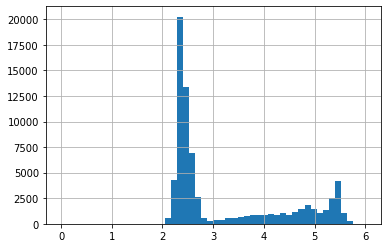

In [40]:
np.log10(dftest_all['predictions_test']+1).hist(bins=50,  range=[0,6])

<AxesSubplot:>

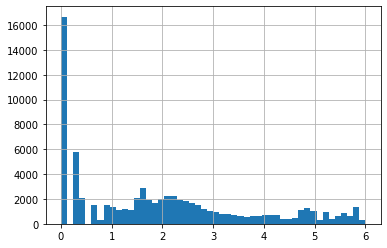

In [41]:
np.log10(dftest_all['timedelta']+1).hist(bins=50,  range=[0,6])

<AxesSubplot:>

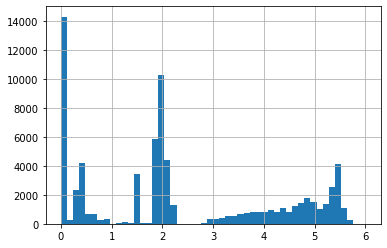

In [42]:
np.log10(dftest_all['predictions']+1).hist(bins=50,  range=[0,6])

C:\Users\20175892\Anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log10
  result = func(self.values, **kwargs)


<AxesSubplot:xlabel='timedelta', ylabel='predictions_test'>

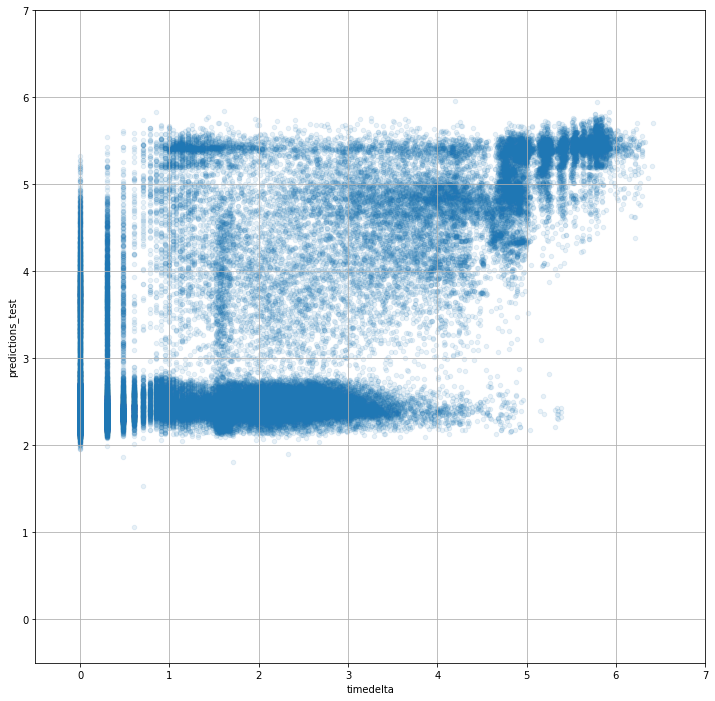

In [43]:
np.log10(dftest_all+1).plot.scatter(x='timedelta', y='predictions_test',alpha=0.1, figsize=(12,12), grid=True, ylim=(-.5,7), xlim=(-.5,7))

<AxesSubplot:xlabel='timedelta', ylabel='predictions'>

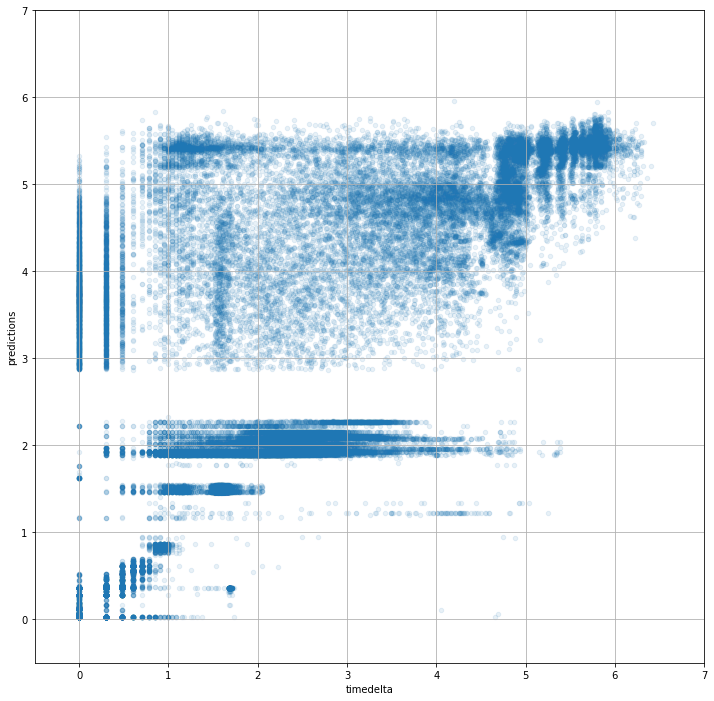

In [44]:
np.log10(dftest_all+1).plot.scatter(x='timedelta', y='predictions',alpha=0.1, figsize=(12,12), grid=True, ylim=(-.5,7), xlim=(-.5,7))

<AxesSubplot:xlabel='timedelta', ylabel='predictions'>

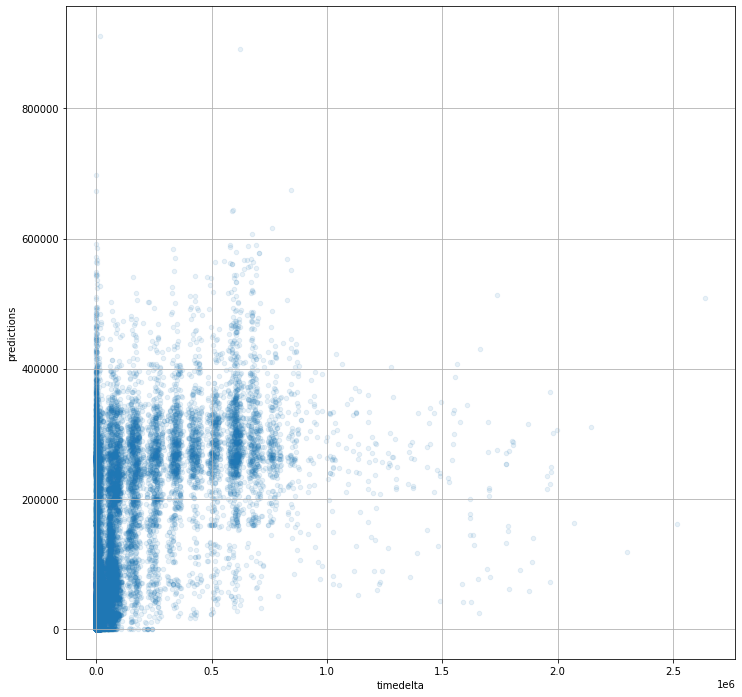

In [45]:
(dftest_all).plot.scatter(x='timedelta', y='predictions',alpha=0.1, figsize=(12,12), grid=True)

<AxesSubplot:xlabel='timedelta', ylabel='error'>

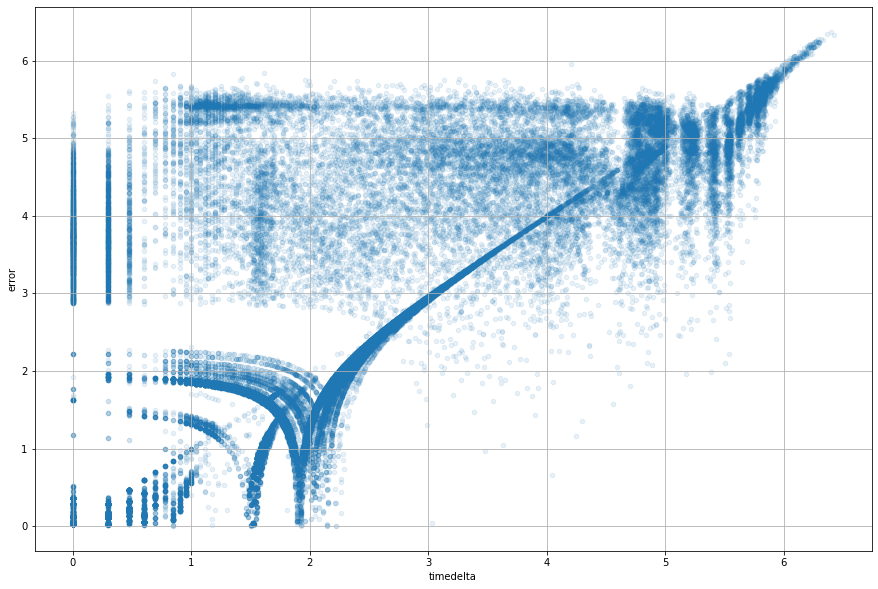

In [46]:
np.log10(dftest_all+1).plot.scatter(x='timedelta', y='error',alpha=0.1, figsize=(15,10), grid=True)

<AxesSubplot:xlabel='timedelta', ylabel='error'>

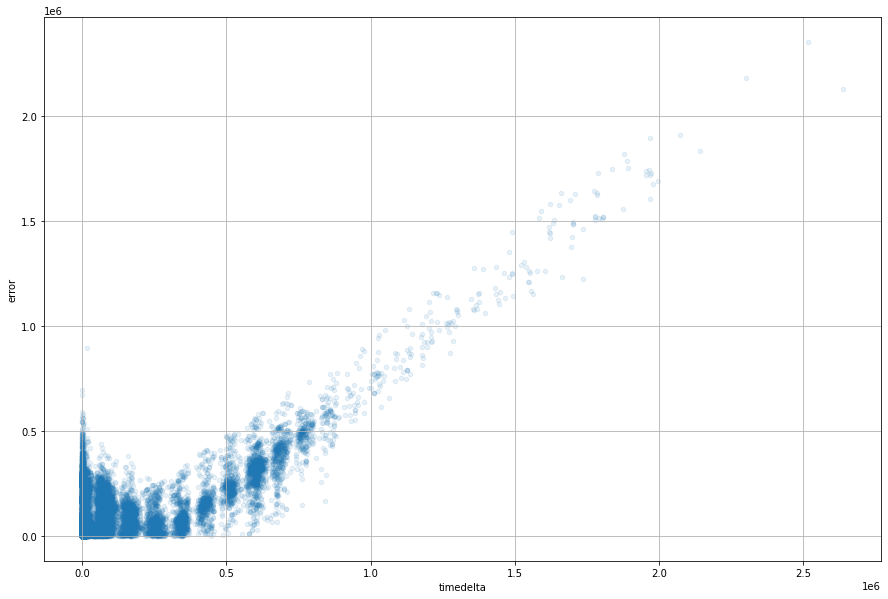

In [47]:
(dftest_all+1).plot.scatter(x='timedelta', y='error',alpha=0.1, figsize=(15,10), grid=True)

<AxesSubplot:xlabel='timedelta', ylabel='predictions'>

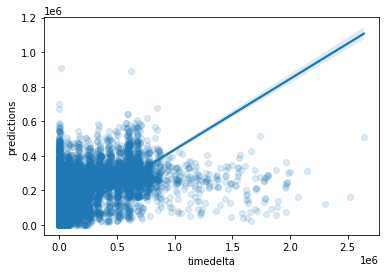

In [48]:
sns.regplot(x='timedelta', y='predictions', data=dftest_all, scatter_kws={'alpha':0.15})

In [49]:
end2 = time.time()
print(end2-start)

133.2137894630432


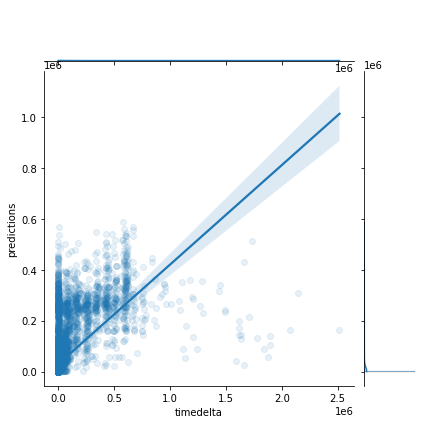

In [53]:
dftest_all['timedelta_log'] = np.log10(dftest_all['timedelta']+1)
dftest_all['predictions_log'] = np.log10(dftest_all['predictions']+1)
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
fig = sns.jointplot(x='timedelta', y='predictions', data=dftest_all[:10000], kind='reg', scatter_kws={'alpha':0.1})

<AxesSubplot:xlabel='timedelta_log', ylabel='predictions_log'>

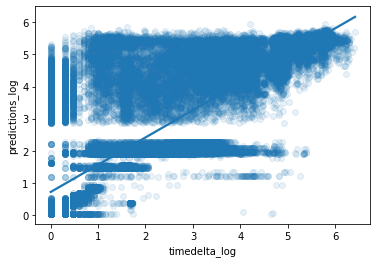

In [54]:
sns.regplot(x='timedelta_log', y='predictions_log', data=dftest_all, scatter_kws={'alpha':0.1}, fit_reg=True)

In [56]:
stats.pearsonr(x=dftest_all['timedelta_log'], y=dftest_all['predictions_log'])

(0.777414555637508, 0.0)

In [57]:
stats.pearsonr(x=dftest_all['timedelta'], y=dftest_all['predictions'])

(0.6107271550455975, 0.0)

In [58]:
stats.pearsonr(x=dftest_all['timedelta'], y=dftest_all['error'])

(0.7678338530626312, 0.0)